<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C_0531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/KDT_240424/m3_분석_라이브러리/pandas/m_3_datas/auto-mpg.csv'

# df = pd.read_csv(file_path)
df = pd.read_csv(file_path)

# 파일 확인
print(df)
df.info()

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

df = df.astype({'horsepower': 'float64'})


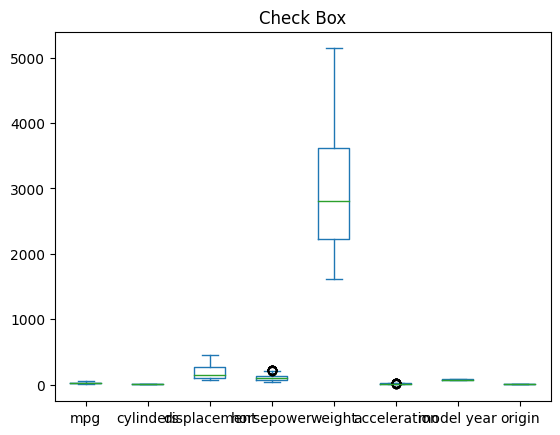

In [ ]:
df.plot.box()
plt.title('Check Box')
plt.show()

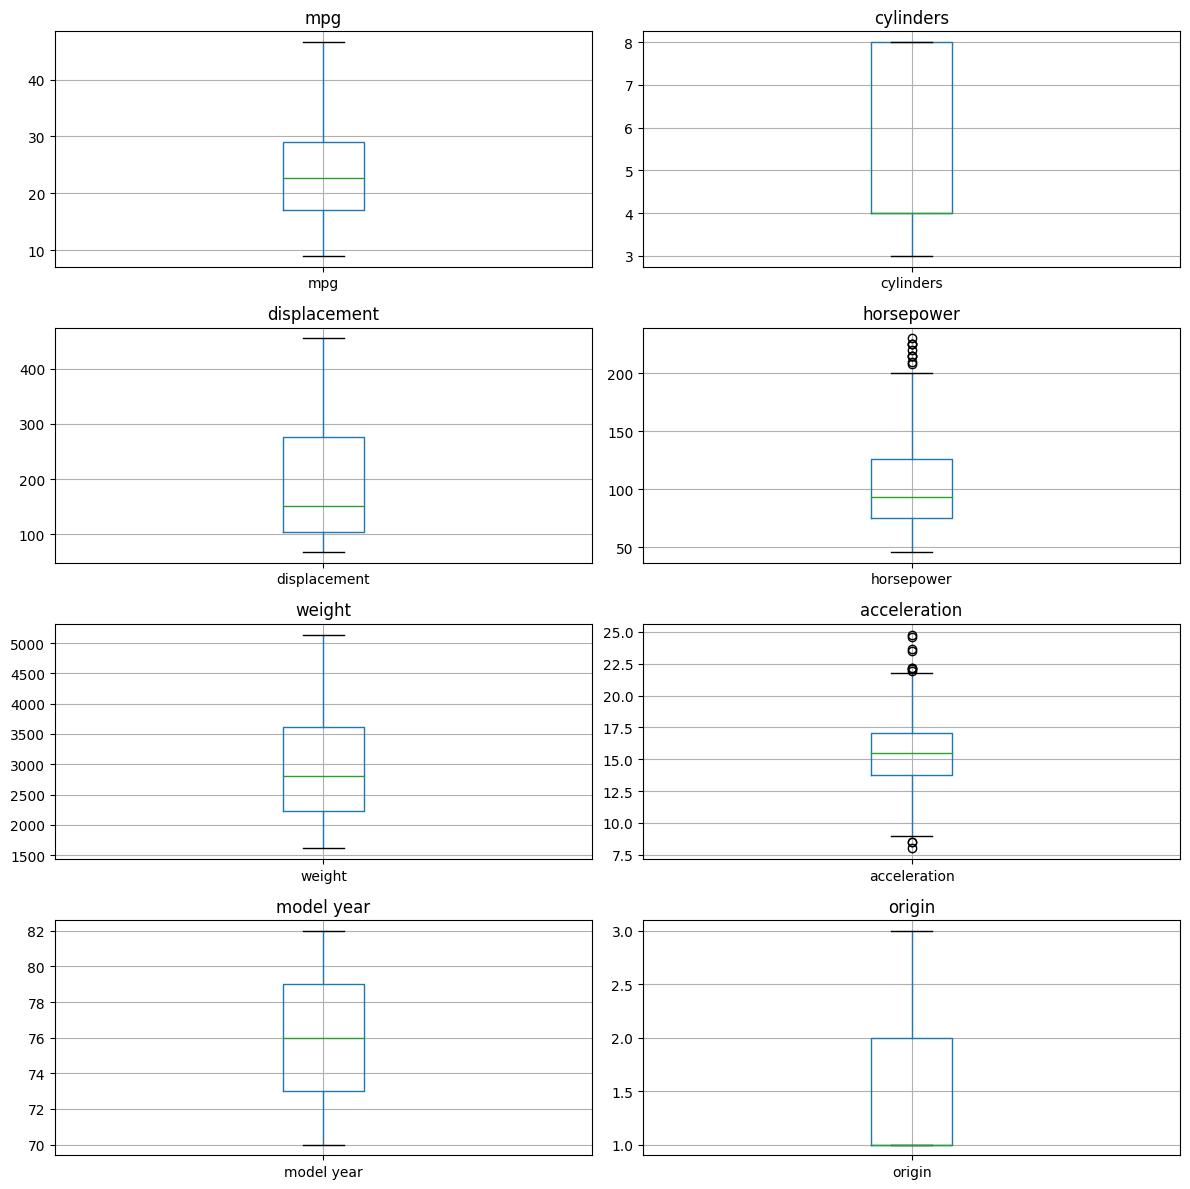

In [ ]:
df.drop('car name', axis=1, inplace=True)
# df

# 데이터프레임의 열 수
num_columns = len(df.columns)

# 그래프의 크기 설정
plt.figure(figsize =(12, 12))

# 각 열에 대한 박스풀롯을 그립니다
for i, column in enumerate(df.columns):
    plt.subplot(4, 2, i+1)
    df.boxplot(column=column)
    plt.title(column)

# 레이아웃을 조정합니다
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix, '\n')

target_variable = 'mpg'
correlation_threshold = 0.5
correlation_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()
print(correlation_features)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

In [ ]:
from sklearn.preprocessing import StandardScaler

analysis_df = df[correlation_features]
target_variable = 'mpg'

# print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns = [target_variable]))

# print(scaled_features)

# 데이터 프레임으로 전환
scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values
print(scaled_df)

     cylinders  displacement  horsepower    weight  model year    origin   mpg
0     1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641  18.0
1     1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641  15.0
2     1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641  18.0
3     1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641  16.0
4     1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641  17.0
..         ...           ...         ...       ...         ...       ...   ...
387  -0.864014     -0.520637   -0.480448 -0.221125    1.636410 -0.716641  27.0
388  -0.864014     -0.932079   -1.364896 -0.999134    1.636410  0.526382  44.0
389  -0.864014     -0.568479   -0.532474 -0.804632    1.636410 -0.716641  32.0
390  -0.864014     -0.712005   -0.662540 -0.415627    1.636410 -0.716641  28.0
391  -0.864014     -0.721574   -0.584501 -0.303641    1.636410 -0.716641  31.0

[392 rows x 7 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 독립변수 : X_train, 종속변수 : y_train

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,4)}")
print(f"Root Mean Squared Error: {round(rmse,4)}")
print(f"R-squared: {round(r2,4)}")

Mean Squared Error: 10.7643
Root Mean Squared Error: 3.2809
R-squared: 0.7891


####강사님 풀이

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)
# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/KDT_240424/m3_분석_라이브러리/pandas/m_3_datas/auto-mpg.csv'

# df = pd.read_csv(file_path)
df = pd.read_csv(file_path)

# 파일 확인
print(df)
df.info()

Saving auto-mpg.csv to auto-mpg.csv
      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1    

In [ ]:
# 중복 말고 고유의 값 확인 가능
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# DataFrame을 순회하면서 숫자가 아닌 값을 출력
for index, row in df.iterrows():
    for column in df.columns:
        try:
            pd.to_numeric(row[column])
        except ValueError:
            print(f"인덱스 {index}의 {column} 컬럼에는 숫자가 아닌 값이 있습니다: {row[column]}")

인덱스 0의 car name 컬럼에는 숫자가 아닌 값이 있습니다: chevrolet chevelle malibu
인덱스 1의 car name 컬럼에는 숫자가 아닌 값이 있습니다: buick skylark 320
인덱스 2의 car name 컬럼에는 숫자가 아닌 값이 있습니다: plymouth satellite
인덱스 3의 car name 컬럼에는 숫자가 아닌 값이 있습니다: amc rebel sst
인덱스 4의 car name 컬럼에는 숫자가 아닌 값이 있습니다: ford torino
인덱스 5의 car name 컬럼에는 숫자가 아닌 값이 있습니다: ford galaxie 500
인덱스 6의 car name 컬럼에는 숫자가 아닌 값이 있습니다: chevrolet impala
인덱스 7의 car name 컬럼에는 숫자가 아닌 값이 있습니다: plymouth fury iii
인덱스 8의 car name 컬럼에는 숫자가 아닌 값이 있습니다: pontiac catalina
인덱스 9의 car name 컬럼에는 숫자가 아닌 값이 있습니다: amc ambassador dpl
인덱스 10의 car name 컬럼에는 숫자가 아닌 값이 있습니다: dodge challenger se
인덱스 11의 car name 컬럼에는 숫자가 아닌 값이 있습니다: plymouth 'cuda 340
인덱스 12의 car name 컬럼에는 숫자가 아닌 값이 있습니다: chevrolet monte carlo
인덱스 13의 car name 컬럼에는 숫자가 아닌 값이 있습니다: buick estate wagon (sw)
인덱스 14의 car name 컬럼에는 숫자가 아닌 값이 있습니다: toyota corona mark ii
인덱스 15의 car name 컬럼에는 숫자가 아닌 값이 있습니다: plymouth duster
인덱스 16의 car name 컬럼에는 숫자가 아닌 값이 있습니다: amc hornet
인덱스 17의 car name 컬럼에는 숫자가 아닌 값이 있습니다: ford maverick
인

In [ ]:
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# car name 열 제거
df = df.drop(columns = ['car name'])

# df['horsepower'] = df['horsepower'].astype(float) 이거랑 같은 코딩
# df = df.astype({'horsepower': 'float64'})


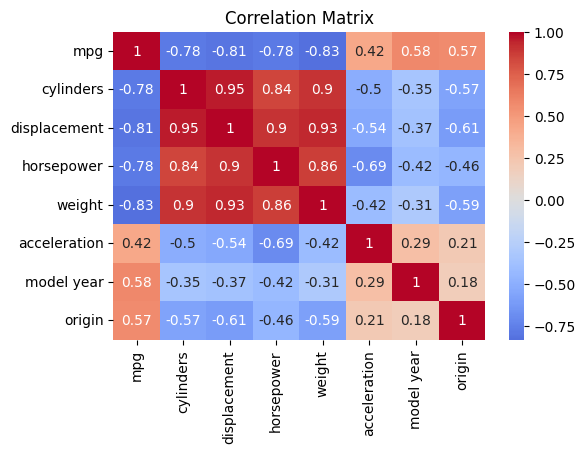

In [ ]:
# 탐색적 데이터 분석
# center=0 : 색상 맵의 중앙값이 0, 0보다 큰 값과 작은 값이 다른색으로 표시
plt.figure(figsize = (6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 변수 선정 (상관계수 기반)
target_variable = 'mpg'
correlation_threshold = 0.5

correlation_fetures = df.corr()[target_variable][abs(df.corr()[target_variable]) > correlation_threshold].index.tolist()

print(correlation_features, '\n')

# 파생 변수 생성 : 예를 들어, 중량 대비 마력비 (horsepower-to-weight ratio)
df['hp_to_weight'] = df['horsepower'] / df['weight']
print(df['hp_to_weight'].head(), '\n')
df.head()

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin'] 

0    0.037100
1    0.044679
2    0.043655
3    0.043694
4    0.040591
Name: hp_to_weight, dtype: float64 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [ ]:
# 분석용 데이터셋 구축
selected_features = correlation_features + ['hp_to_weight']
analysis_df = df[selected_features]

analysis_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,70,1,0.037100
1,15.0,8,350.0,165.0,3693,70,1,0.044679
2,18.0,8,318.0,150.0,3436,70,1,0.043655
3,16.0,8,304.0,150.0,3433,70,1,0.043694
4,17.0,8,302.0,140.0,3449,70,1,0.040591


In [ ]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화 된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight   mpg  
0      0.382496  18.0  
1      1.661177  15.0  
2      1.488456  18.0  
3      1.494892  16.0  
4      0.971505  17.0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 독립변수 : X_train, 종속변수 : y_train

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,4)}")
print(f"Root Mean Squared Error: {round(rmse,4)}")
print(f"R-squared: {round(r2,4)}")

Mean Squared Error: 10.1391
Root Mean Squared Error: 3.1842
R-squared: 0.8014
